In [205]:
#Importing the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Clean the Census data

In [206]:
# Read the census data
census_data = pd.read_csv('Data/census_2011.csv')

### Problem - 1  (Keep the relevant data)

In [209]:
census_data.columns

Index(['District code', 'State name', 'District name', 'Population', 'Male',
       'Female', 'Literate', 'Male_Literate', 'Female_Literate', 'SC',
       ...
       'Power_Parity_Rs_90000_150000', 'Power_Parity_Rs_45000_150000',
       'Power_Parity_Rs_150000_240000', 'Power_Parity_Rs_240000_330000',
       'Power_Parity_Rs_150000_330000', 'Power_Parity_Rs_330000_425000',
       'Power_Parity_Rs_425000_545000', 'Power_Parity_Rs_330000_545000',
       'Power_Parity_Above_Rs_545000', 'Total_Power_Parity'],
      dtype='object', length=118)

***There are 118 columns in the census_data which we dont need all the columns for our task.So we need to filter the relavent columns which are needed for further processing.

In [210]:
# Select the relevant columns
relevant_columns = [
    'State name',
    'District name',
    'Population',
    'Male',
    'Female',
    'Literate',
    'Male_Literate',
    'Female_Literate',
    'Rural_Households',
    'Urban_Households',
    'Households',
    'Age_Group_0_29',
    'Age_Group_30_49',
    'Age_Group_50',
    'Age not stated'
]
census_data = census_data[relevant_columns]

In [211]:
print(list(census_data.columns))

['State name', 'District name', 'Population', 'Male', 'Female', 'Literate', 'Male_Literate', 'Female_Literate', 'Rural_Households', 'Urban_Households', 'Households', 'Age_Group_0_29', 'Age_Group_30_49', 'Age_Group_50', 'Age not stated']


***We clearly obtained the relevent columns which we need

### Problem - 2 (Rename the Column names)

***Some of the column names in the dataset are not easy to understand by everyone.So we need to convert those names so that they can be easily understandable.

In [212]:
# Rename the columns
column_names = {
    'State name': 'State/UT',
    'District name': 'District',
    'Male_Literate': 'Literate_Male',
    'Female_Literate': 'Literate_Female',
    'Rural_Households': 'Households_Rural',
    'Urban_Households': 'Households_Urban',
    'Age_Group_0_29': 'Young_and_Adult',
    'Age_Group_30_49': 'Middle_Aged',
    'Age_Group_50': 'Senior_Citizen',
    'Age not stated': 'Age_Not_Stated'
}
census_data = census_data.rename(columns = column_names)

In [213]:
print(list(census_data.columns))

['State/UT', 'District', 'Population', 'Male', 'Female', 'Literate', 'Literate_Male', 'Literate_Female', 'Households_Rural', 'Households_Urban', 'Households', 'Young_and_Adult', 'Middle_Aged', 'Senior_Citizen', 'Age_Not_Stated']


In [214]:
data = census_data.copy()

### Problem - 3 (Rename State/UT Names)

***The State/UT names are in all caps in the census data, For uniformity across datasets we use the names so that only the first character of each word in the name is in upper case and the rest are in lower case. However, if the word is “and” then it should be all lowercase.

In [215]:
def Capitalize(name):
    name = name.title()
    l = name.split()
    for i in range(len(l)):
        if (l[i] == 'And'):
            l[i] = 'and'
    return ' '.join(l)

In [216]:
census_data['State/UT'] = census_data['State/UT'].apply(lambda x :Capitalize(x))

In [217]:
census_data['State/UT'].unique()

array(['Jammu and Kashmir', 'Himachal Pradesh', 'Punjab', 'Chandigarh',
       'Uttarakhand', 'Haryana', 'Nct Of Delhi', 'Rajasthan',
       'Uttar Pradesh', 'Bihar', 'Sikkim', 'Arunachal Pradesh',
       'Nagaland', 'Manipur', 'Mizoram', 'Tripura', 'Meghalaya', 'Assam',
       'West Bengal', 'Jharkhand', 'Orissa', 'Chhattisgarh',
       'Madhya Pradesh', 'Gujarat', 'Daman and Diu',
       'Dadra and Nagar Haveli', 'Maharashtra', 'Andhra Pradesh',
       'Karnataka', 'Goa', 'Lakshadweep', 'Kerala', 'Tamil Nadu',
       'Pondicherry', 'Andaman and Nicobar Islands'], dtype=object)

### Problem - 4 (New State/UT formation)

***In 2014 Telangana was formed after it split from Andhra Pradesh, The districts that were included in Telangana are stored in Data/Telangana.txt . Read the text file and Rename the State/UT From “Andhra Pradesh” to “Telangana” for the given districts.

In [218]:
telangana_districts = pd.read_csv('Data/Telangana.txt',header = None)

In [219]:
telangana_districts

,0
0,Adilabad
1,Nizamabad
2,Karimnagar
3,Medak
4,Hyderabad
5,Rangareddy
6,Mahbubnagar
7,Nalgonda
8,Warangal
9,Khammam


In [220]:
telangana_districts.rename(columns = {0:'District'},inplace = True)

In [221]:
telangana_districts

,District
0,Adilabad
1,Nizamabad
2,Karimnagar
3,Medak
4,Hyderabad
5,Rangareddy
6,Mahbubnagar
7,Nalgonda
8,Warangal
9,Khammam


In [222]:
census_data.loc[census_data['District'].isin(telangana_districts['District']),'State/UT'] = 'Telangana'

In [223]:
census_data[census_data['State/UT'] == 'Telangana']

,State/UT,District,Population,Male,Female,Literate,Literate_Male,Literate_Female,Households_Rural,Households_Urban,Households,Young_and_Adult,Middle_Aged,Senior_Citizen,Age_Not_Stated
531,Telangana,Adilabad,2741239.0,NaN,1371642.0,1483347.0,856350.0,626997.0,NaN,220248.0,817714.0,1536378.0,704551.0,422522.0,77788.0
532,Telangana,Nizamabad,2551335.0,1250641.0,1300694.0,1389810.0,790214.0,599596.0,565165.0,155133.0,720298.0,1399773.0,676401.0,437573.0,37588.0
533,Telangana,Karimnagar,3776269.0,1880800.0,1895469.0,2206829.0,1257238.0,949591.0,877236.0,288044.0,1165280.0,1940234.0,1031735.0,728494.0,75806.0
534,Telangana,Medak,3033288.0,1523030.0,1510258.0,1637137.0,953406.0,683731.0,593653.0,195479.0,789132.0,1735769.0,779738.0,509368.0,8413.0
535,Telangana,Hyderabad,3943323.0,2018575.0,1924748.0,2892155.0,1542688.0,1349467.0,0.0,1066289.0,1066289.0,2249130.0,1068243.0,542669.0,83281.0
536,Telangana,Rangareddy,5296741.0,2701008.0,2595733.0,NaN,1948784.0,1589244.0,432098.0,1129224.0,1561322.0,2966988.0,1455864.0,738037.0,135852.0
537,Telangana,Mahbubnagar,4053028.0,2050386.0,2002642.0,1940646.0,1158386.0,782260.0,848963.0,161052.0,1010015.0,2360874.0,1027525.0,637430.0,27199.0
538,Telangana,Nalgonda,3488809.0,1759772.0,1729037.0,2001019.0,1160757.0,840262.0,833504.0,197433.0,1030937.0,1932349.0,897137.0,651748.0,7575.0
539,Telangana,Warangal,3512576.0,1759281.0,1753295.0,2065023.0,1179790.0,885233.0,758738.0,288249.0,1046987.0,1891954.0,941452.0,664872.0,14298.0
540,Telangana,Khammam,2797370.0,1390988.0,1406382.0,1630234.0,901640.0,728594.0,669262.0,201363.0,870625.0,1530602.0,774583.0,477955.0,14230.0


In [224]:
data = census_data.copy()

***In 2019 Laddakh was formed after it split from Jammu and Kashmir, which included the districts Leh and Kargil.  Rename the State/UT From “Jammu and Kashmir” to “Laddakh” for the given districts. 

In [226]:
census_data.loc[census_data['District'].isin(['Leh','Kargil']),'State/UT'] = 'Laddakh'

### Problem - 5 (Find and process Missing Data)

In [227]:
census_data = data.copy()

In [234]:
#Checking the null Values
nullValues_before = census_data.isnull().sum()
print(nullValues_before)

State/UT            0
District            0
Population          1
Male                1
Female              0
Literate            2
Literate_Male       2
Literate_Female     2
Households_Rural    6
Households_Urban    3
Households          5
Young_and_Adult     4
Middle_Aged         6
Senior_Citizen      8
Age_Not_Stated      3
dtype: int64


***Some data can be found and filled in by using information from other cells. Try to find the correct data by using information from other cells and filling it in. Find and store the percentage of data missing for each column.

In [235]:
census_data['Population'].fillna(census_data['Male'] + census_data['Female'], inplace=True)
census_data['Literate'].fillna(census_data['Literate_Male'] + census_data['Literate_Female'], inplace=True)
census_data['Population'].fillna(census_data['Young_and_Adult'] + census_data['Middle_Aged'] + census_data['Senior_Citizen'] + census_data['Age_Not_Stated'], inplace=True)
census_data['Households'].fillna(census_data['Households_Rural'] + census_data['Households_Urban'], inplace=True)
census_data['Male'].fillna(census_data['Population'] - census_data['Female'], inplace=True)
census_data['Female'].fillna(census_data['Population'] - census_data['Male'], inplace=True)
census_data['Literate_Male'].fillna(census_data['Literate'] - census_data['Literate_Female'], inplace=True)
census_data['Literate_Female'].fillna(census_data['Literate'] - census_data['Literate_Male'], inplace=True)
census_data['Age_Not_Stated'].fillna(census_data['Population'] - census_data['Young_and_Adult'] - census_data['Middle_Aged'] - census_data['Senior_Citizen'], inplace=True)
census_data['Young_and_Adult'].fillna(census_data['Population'] - census_data['Middle_Aged'] - census_data['Senior_Citizen'] - census_data['Age_Not_Stated'], inplace=True)
census_data['Middle_Aged'].fillna(census_data['Population'] - census_data['Young_and_Adult'] - census_data['Senior_Citizen'] - census_data['Age_Not_Stated'], inplace=True)
census_data['Senior_Citizen'].fillna(census_data['Population'] - census_data['Young_and_Adult'] - census_data['Middle_Aged'] - census_data['Age_Not_Stated'], inplace=True)
census_data['Households_Rural'].fillna(census_data['Households'] - census_data['Households_Urban'], inplace=True)
census_data['Households_Urban'].fillna(census_data['Households'] - census_data['Households_Rural'], inplace=True)

In [236]:
#Checking null values after processing
nullValues_after = census_data.isnull().sum()
nullValues_after

State/UT            0
District            0
Population          1
Male                1
Female              0
Literate            2
Literate_Male       2
Literate_Female     2
Households_Rural    6
Households_Urban    3
Households          5
Young_and_Adult     4
Middle_Aged         6
Senior_Citizen      8
Age_Not_Stated      3
dtype: int64

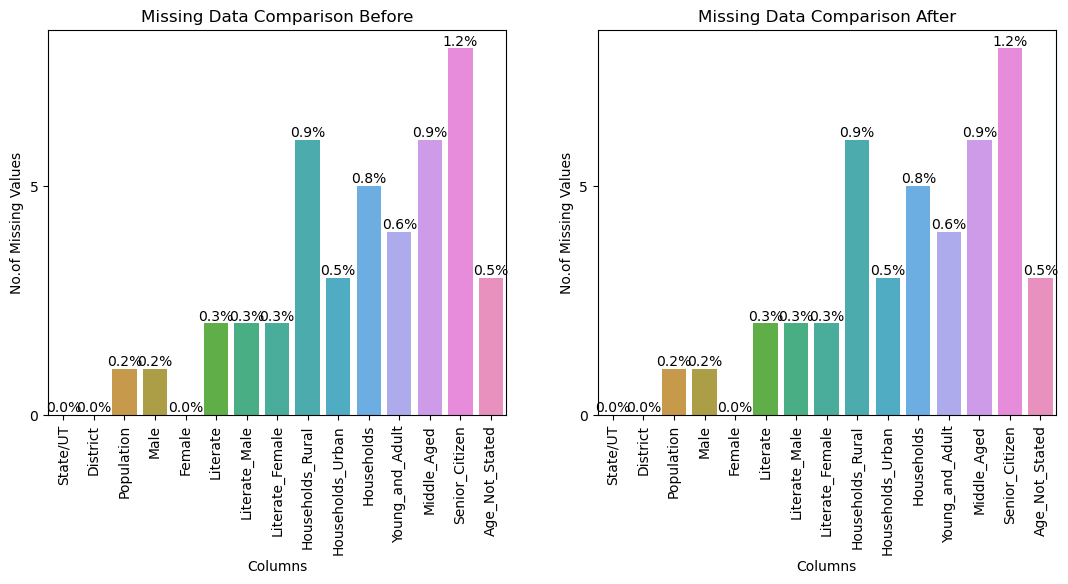

In [238]:
fig,ax = plt.subplots(1,2,figsize = (13,5))
sns.barplot(x = nullValues_before.index, y = nullValues_before,ax = ax[0])
ax[0].set_xlabel('Columns')
ax[0].set_ylabel('No.of Missing Values')
ax[0].set_title('Missing Data Comparison Before')
ax[0].set_xticklabels(nullValues_before.index,rotation=90)
#plt.show()
for p in ax[0].patches:
    ax[0].annotate(format(p.get_height()/census_data.shape[0] *100, '.1f')+'%', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom')
sns.barplot(x = nullValues_after.index, y = nullValues_after,ax = ax[1])
plt.xlabel('Columns')
plt.ylabel('No.of Missing Values')
plt.title('Missing Data Comparison After')
plt.xticks(rotation=90)
for p in ax[1].patches:
    ax[1].annotate(format(p.get_height()/census_data.shape[0] *100, '.1f')+'%', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom')
max_value = max(max(nullValues_before), max(nullValues_after))
yticks = np.arange(0, max_value + 1, 5)
ax[0].set_yticks(yticks)
ax[1].set_yticks(yticks)
plt.show()

### Problem - 6 (Save Data)

**saving the cleaned data

In [239]:
census_data.to_csv('Clean_Data/census.csv')

# Extract Information from the housing data along with the census data

### Problem -7 (Process the relevant data)

**Getting the relevent columns

In [240]:
#Read Housing data
housing_data = pd.read_csv('Data/housing.csv')
#Filter the relevent columns
housing_data = housing_data[['District Name', 'Rural/Urban', 'Total Number of households', 'Total Number of Livable', 'Total Number of Dilapidated', 'Latrine_premise']]
housing_data.head()

,District Name,Rural/Urban,Total Number of households,Total Number of Livable,Total Number of Dilapidated,Latrine_premise
0,Kupwara,Rural,100,58.1,8.3,48.9
1,Kupwara,Total,100,57.3,7.9,50.9
2,Kupwara,Urban,100,49.5,4.8,70.2
3,Badgam,Rural,100,46.3,3.9,83.3
4,Badgam,Total,100,44.7,3.8,84.3


In [241]:
housing_data['Total Number of households'].value_counts()

100    1908
Name: Total Number of households, dtype: int64

**In the given data The total number of households, Total Number of Livable, Total Number of Dilapidated, Latrine_premise, etc. seem to be in percentage terms and not in absolute terms.
The total number of households in a district can be found in the census data. Take the information from the census data and find the absolute values for the Total Number of Dilapidated, and Latrine_premise for both rural and urban areas of each district.


In [242]:
rural_housing = housing_data[housing_data['Rural/Urban'] == 'Rural']
urban_housing = housing_data[housing_data['Rural/Urban'] == 'Urban']

In [243]:
rural_housing.head()

,District Name,Rural/Urban,Total Number of households,Total Number of Livable,Total Number of Dilapidated,Latrine_premise
0,Kupwara,Rural,100,58.1,8.3,48.9
3,Badgam,Rural,100,46.3,3.9,83.3
6,Leh(Ladakh),Rural,100,51.5,2.1,88.1
9,Kargil,Rural,100,73.3,3.5,96.8
12,Punch,Rural,100,59.5,2.4,13.7


In [244]:
urban_housing.head()

,District Name,Rural/Urban,Total Number of households,Total Number of Livable,Total Number of Dilapidated,Latrine_premise
2,Kupwara,Urban,100,49.5,4.8,70.2
5,Badgam,Urban,100,33.8,2.6,90.4
8,Leh(Ladakh),Urban,100,54.6,1.1,95.8
11,Kargil,Urban,100,68.8,1.2,97.5
14,Punch,Urban,100,27.3,0.8,75.3


In [245]:
rural_housing.drop(columns =['Rural/Urban'],inplace = True)
urban_housing.drop(columns = ['Rural/Urban'],inplace = True)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_24544\2468378829.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rural_housing.drop(columns =['Rural/Urban'],inplace = True)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_24544\2468378829.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  urban_housing.drop(columns = ['Rural/Urban'],inplace = True)


In [246]:
updated_housing = urban_housing.merge(rural_housing,how = 'left', on = 'District Name',suffixes = ['_urban','_rural'])

In [247]:
updated_housing

,District Name,Total Number of households_urban,Total Number of Livable_urban,Total Number of Dilapidated_urban,Latrine_premise_urban,Total Number of households_rural,Total Number of Livable_rural,Total Number of Dilapidated_rural,Latrine_premise_rural
0,Kupwara,100,49.5,4.8,70.2,100.0,58.1,8.3,48.9
1,Badgam,100,33.8,2.6,90.4,100.0,46.3,3.9,83.3
2,Leh(Ladakh),100,54.6,1.1,95.8,100.0,51.5,2.1,88.1
3,Kargil,100,68.8,1.2,97.5,100.0,73.3,3.5,96.8
4,Punch,100,27.3,0.8,75.3,100.0,59.5,2.4,13.7
...,...,...,...,...,...,...,...,...,...
644,Puducherry,100,19.0,1.2,82.5,100.0,31.9,2.6,35.8
645,Mahe,100,15.8,1.1,97.8,NaN,NaN,NaN,NaN
646,Karaikal,100,21.0,1.2,74.4,100.0,36.8,2.1,47.6
647,North & Middle Andaman,100,55.9,6.6,56.1,100.0,44.3,2.7,48.0


In [248]:
merged_data = pd.merge(updated_housing,census_data,how = 'inner',left_on = 'District Name',right_on = 'District')

In [249]:
merged_data

,District Name,Total Number of households_urban,Total Number of Livable_urban,Total Number of Dilapidated_urban,Latrine_premise_urban,Total Number of households_rural,Total Number of Livable_rural,Total Number of Dilapidated_rural,Latrine_premise_rural,State/UT,...,Literate,Literate_Male,Literate_Female,Households_Rural,Households_Urban,Households,Young_and_Adult,Middle_Aged,Senior_Citizen,Age_Not_Stated
0,Kupwara,100,49.5,4.8,70.2,100.0,58.1,8.3,48.9,Jammu and Kashmir,...,439654.0,282823.0,156831.0,158438.0,23226.0,181664.0,600759.0,178435.0,89679.0,1481.0
1,Badgam,100,33.8,2.6,90.4,100.0,46.3,3.9,83.3,Jammu and Kashmir,...,335649.0,207741.0,127908.0,160649.0,27190.0,187839.0,503223.0,160933.0,88978.0,611.0
2,Leh(Ladakh),100,54.6,1.1,95.8,100.0,51.5,2.1,88.1,Jammu and Kashmir,...,93770.0,62834.0,30936.0,36920.0,17474.0,54394.0,70703.0,41515.0,21019.0,250.0
3,Kargil,100,68.8,1.2,97.5,100.0,73.3,3.5,96.8,Jammu and Kashmir,...,86236.0,56301.0,29935.0,40370.0,7774.0,48144.0,87532.0,35561.0,17488.0,221.0
4,Punch,100,27.3,0.8,75.3,100.0,59.5,2.4,13.7,Jammu and Kashmir,...,261724.0,163333.0,98391.0,132139.0,15269.0,147408.0,304979.0,109818.0,61334.0,704.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
664,Tiruppur,100,23.6,0.7,75.0,100.0,27.6,1.7,30.9,Tamil Nadu,...,1760566.0,959623.0,800943.0,356886.0,538022.0,894908.0,1177987.0,794639.0,504674.0,1752.0
665,Yanam,100,15.4,0.7,81.9,NaN,NaN,NaN,NaN,Pondicherry,...,39274.0,19919.0,19355.0,0.0,15519.0,15519.0,31973.0,15235.0,8402.0,16.0
666,Mahe,100,15.8,1.1,97.8,NaN,NaN,NaN,NaN,Pondicherry,...,36470.0,16610.0,19860.0,0.0,12110.0,12110.0,19760.0,12543.0,9428.0,85.0
667,Karaikal,100,21.0,1.2,74.4,100.0,36.8,2.1,47.6,Pondicherry,...,154916.0,79903.0,75013.0,35618.0,33715.0,69333.0,NaN,60089.0,NaN,366.0


In [250]:
merged_data['Households_Rural_Livable'] = merged_data['Households_Rural'] * merged_data['Total Number of Livable_rural'] / 100
merged_data['Households_Rural_Dilapidated'] = merged_data['Households_Rural'] * merged_data['Total Number of Dilapidated_rural'] / 100
merged_data['Households_Rural_Toilet_Premise'] = merged_data['Households_Rural'] * merged_data['Latrine_premise_rural'] / 100
merged_data['Households_Urban_Livable'] = merged_data['Households_Urban'] * merged_data['Total Number of Livable_urban'] / 100
merged_data['Households_Urban_Dilapidated'] = merged_data['Households_Urban'] * merged_data['Total Number of Dilapidated_urban'] / 100
merged_data['Households_Urban_Toilet_Premise'] = merged_data['Households_Urban'] * merged_data['Latrine_premise_urban'] / 100

In [251]:
final_updated_housing_data = merged_data[['District', 'Households_Rural', 'Households_Rural_Livable', 'Households_Rural_Dilapidated',
           'Households_Rural_Toilet_Premise', 'Households_Urban', 'Households_Urban_Livable',
           'Households_Urban_Dilapidated', 'Households_Urban_Toilet_Premise']]

In [252]:
final_updated_housing_data

,District,Households_Rural,Households_Rural_Livable,Households_Rural_Dilapidated,Households_Rural_Toilet_Premise,Households_Urban,Households_Urban_Livable,Households_Urban_Dilapidated,Households_Urban_Toilet_Premise
0,Kupwara,158438.0,92052.478,13150.354,77476.182,23226.0,11496.870,1114.848,16304.652
1,Badgam,160649.0,74380.487,6265.311,133820.617,27190.0,9190.220,706.940,24579.760
2,Leh(Ladakh),36920.0,19013.800,775.320,32526.520,17474.0,9540.804,192.214,16740.092
3,Kargil,40370.0,29591.210,1412.950,39078.160,7774.0,5348.512,93.288,7579.650
4,Punch,132139.0,78622.705,3171.336,18103.043,15269.0,4168.437,122.152,11497.557
...,...,...,...,...,...,...,...,...,...
664,Tiruppur,356886.0,98500.536,6067.062,110277.774,538022.0,126973.192,3766.154,403516.500
665,Yanam,0.0,NaN,NaN,NaN,15519.0,2389.926,108.633,12710.061
666,Mahe,0.0,NaN,NaN,NaN,12110.0,1913.380,133.210,11843.580
667,Karaikal,35618.0,13107.424,747.978,16954.168,33715.0,7080.150,404.580,25083.960


In [253]:
l1 = census_data['District'].unique()
l2 = housing_data['District Name'].unique()

***The following are the districts that are present in one file but not other

In [254]:
print(set(l1).symmetric_difference(set(l2)))

{'North  & Middle Andaman', 'PONDICHERRY', 'Lahul AND Spiti', 'LAKSHADWEEP', 'Puducherry', 'North  AND Middle Andaman', 'Dadra AND Nagar Haveli', 'Lakshadweep', 'Lahul & Spiti', 'Dadra & Nagar Haveli'}


In [108]:
final_updated_housing_data.to_csv('Clean_Data/housing.csv')

### Problem - 8 (Visualise the housing data)

**Number of households for 100 people

In [255]:
grouped_df = merged_data.groupby('State/UT')['Population','Households'].sum()
grouped_df['Households_per_100_people'] = grouped_df['Households']/grouped_df['Population']*100
grouped_df = grouped_df.sort_values(by = 'Households_per_100_people',ascending = False)
grouped_df

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_24544\3571161896.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grouped_df = merged_data.groupby('State/UT')['Population','Households'].sum()


,Population,Households,Households_per_100_people
State/UT,,,
Himachal Pradesh,9259089.0,3999094.0,43.191009
Goa,1458545.0,576582.0,39.531314
Daman and Diu,243247.0,89929.0,36.970240
Andaman and Nicobar Islands,238142.0,85532.0,35.916386
Kerala,33406061.0,11217853.0,33.580293
Uttarakhand,10086292.0,3383410.0,33.544637
Pondicherry,297664.0,96962.0,32.574312
Tamil Nadu,72147030.0,23166721.0,32.110429
Orissa,41974218.0,12759133.0,30.397548


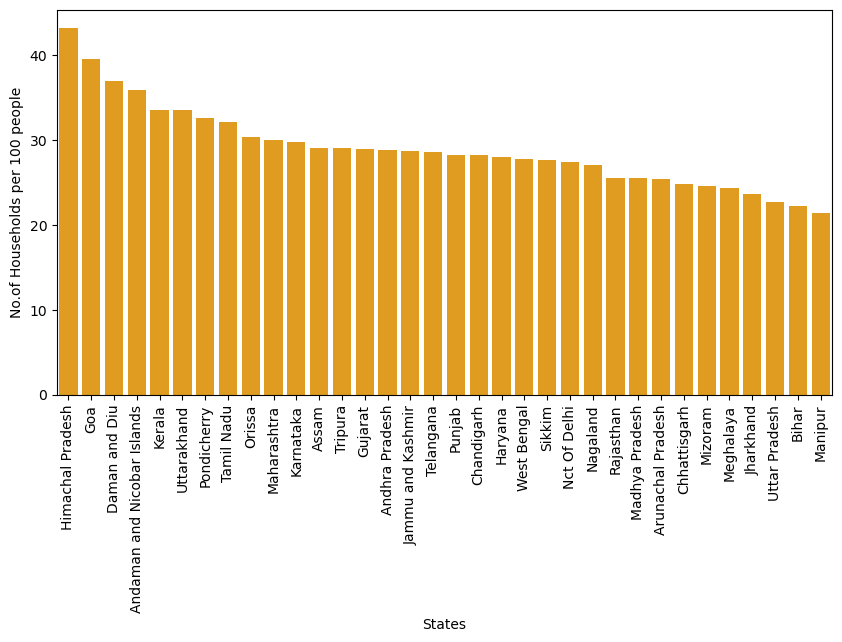

In [256]:
fig,ax = plt.subplots(figsize = (10,5))
#grouped_df = grouped_df.sort_values(by  ='Households',key =  lambda df:df['Households']/grouped_df['Population']*100,axis = 0)
sns.barplot(data = grouped_df,x = grouped_df.index, y = grouped_df['Households_per_100_people'],color = 'orange')
plt.xlabel('States')
plt.ylabel('No.of Households per 100 people')
plt.xticks(rotation = 90)
plt.show()

**Percentage of households having toilets

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_24544\3183710599.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grouped_df = merged_data.groupby('State/UT')['Households_Rural_Toilet_Premise','Households_Urban_Toilet_Premise','Households'].sum()


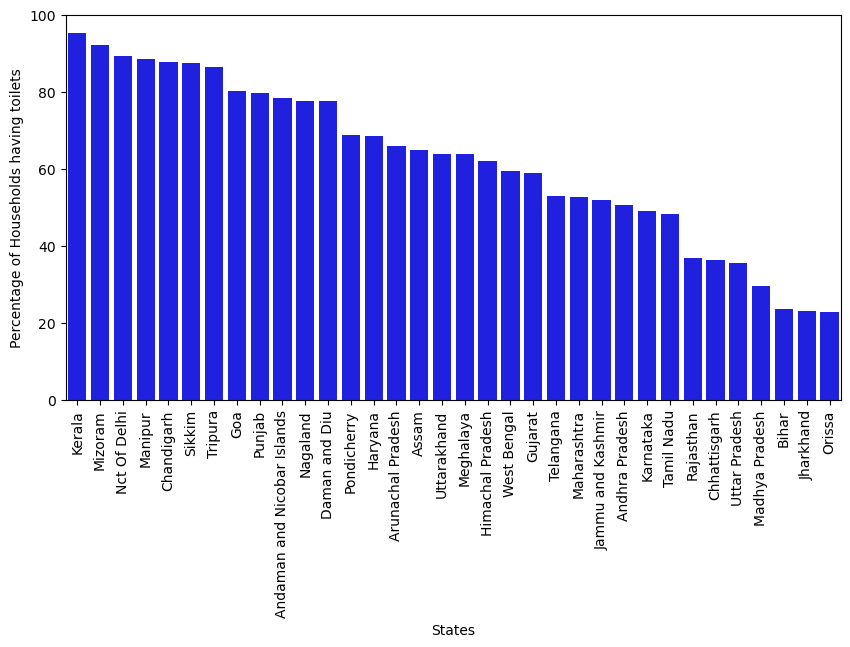

In [258]:
grouped_df = merged_data.groupby('State/UT')['Households_Rural_Toilet_Premise','Households_Urban_Toilet_Premise','Households'].sum()
grouped_df['Households_Total_Toilet_Premise'] = grouped_df['Households_Rural_Toilet_Premise'] + grouped_df['Households_Urban_Toilet_Premise']
percentages = (grouped_df['Households_Total_Toilet_Premise']/grouped_df['Households'])*100
percentages = percentages.sort_values(ascending = False)
fig,ax = plt.subplots(figsize = (10,5))
sns.barplot(x = percentages.index, y = percentages, color = 'blue')
plt.xlabel('States')
plt.ylabel('Percentage of Households having toilets')
plt.xticks(rotation = 90)
plt.show()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_24544\3708616896.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grouped_df = merged_data.groupby('State/UT')['Households_Rural','Households_Urban'].sum()


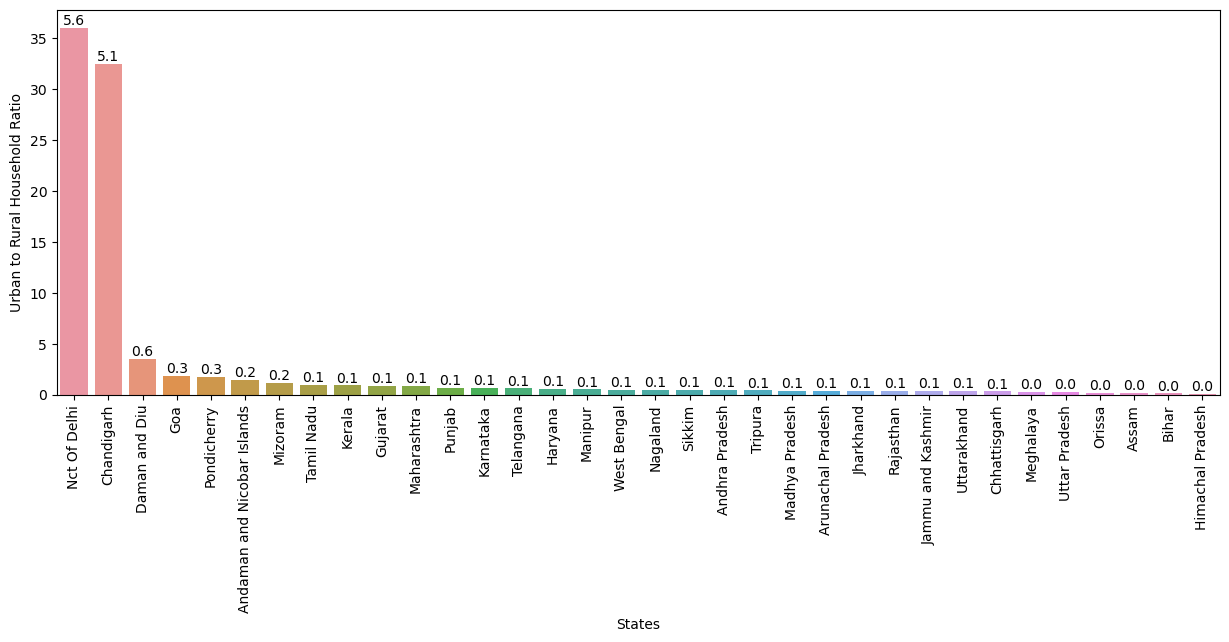

In [112]:
grouped_df = merged_data.groupby('State/UT')['Households_Rural','Households_Urban'].sum()
grouped_df['Urban_Rural_Household_Ratio'] = grouped_df['Households_Urban'] / grouped_df['Households_Rural']
grouped_df = grouped_df['Urban_Rural_Household_Ratio'].sort_values(ascending = False)
fig,ax = plt.subplots(figsize = (15,5))
sns.barplot(x = grouped_df.index, y = grouped_df)
plt.xlabel('States')
plt.ylabel('Urban to Rural Household Ratio')
plt.xticks(rotation = 90)
for p in ax.patches:
    ax.annotate(format(p.get_height()/census_data.shape[0] *100, '.1f'), (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom')
plt.show()

### Problem -9 (Inconsistency in different datasets)

In [113]:
dif = pd.merge(final_updated_housing_data.dropna(),census_data.dropna(),on = 'District',suffixes=['_housingData','_CensusData'],how = 'inner') 
dif.columns

Index(['District', 'Households_Rural_housingData', 'Households_Rural_Livable',
       'Households_Rural_Dilapidated', 'Households_Rural_Toilet_Premise',
       'Households_Urban_housingData', 'Households_Urban_Livable',
       'Households_Urban_Dilapidated', 'Households_Urban_Toilet_Premise',
       'State/UT', 'Population', 'Male', 'Female', 'Literate', 'Literate_Male',
       'Literate_Female', 'Households_Rural_CensusData',
       'Households_Urban_CensusData', 'Households', 'Young_and_Adult',
       'Middle_Aged', 'Senior_Citizen', 'Age_Not_Stated'],
      dtype='object')

In [114]:
district_counts = dif['District'].value_counts()
filtered_df = dif[dif['District'].isin(district_counts[district_counts > 1].index)]
filtered_df.drop_duplicates(inplace = True)
filtered_df

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_24544\2768493461.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.drop_duplicates(inplace = True)


,District,Households_Rural_housingData,Households_Rural_Livable,Households_Rural_Dilapidated,Households_Rural_Toilet_Premise,Households_Urban_housingData,Households_Urban_Livable,Households_Urban_Dilapidated,Households_Urban_Toilet_Premise,State/UT,...,Literate,Literate_Male,Literate_Female,Households_Rural_CensusData,Households_Urban_CensusData,Households,Young_and_Adult,Middle_Aged,Senior_Citizen,Age_Not_Stated
25,Hamirpur,196116.0,42361.056,1961.160,174739.356,15232.0,2619.904,91.392,14059.136,Himachal Pradesh,...,358091.0,180555.0,177536.0,196116.0,15232.0,211348.0,224044.0,123941.0,106641.0,142.0
26,Hamirpur,196116.0,42361.056,1961.160,174739.356,15232.0,2619.904,91.392,14059.136,Uttar Pradesh,...,653299.0,408125.0,245174.0,256081.0,55300.0,311381.0,660774.0,260368.0,181109.0,2034.0
27,Hamirpur,256081.0,55313.496,2560.810,228168.171,55300.0,9511.600,331.800,51041.900,Himachal Pradesh,...,358091.0,180555.0,177536.0,196116.0,15232.0,211348.0,224044.0,123941.0,106641.0,142.0
28,Hamirpur,256081.0,55313.496,2560.810,228168.171,55300.0,9511.600,331.800,51041.900,Uttar Pradesh,...,653299.0,408125.0,245174.0,256081.0,55300.0,311381.0,660774.0,260368.0,181109.0,2034.0
29,Hamirpur,196116.0,99038.580,2941.740,49029.000,15232.0,2619.904,91.392,14059.136,Himachal Pradesh,...,358091.0,180555.0,177536.0,196116.0,15232.0,211348.0,224044.0,123941.0,106641.0,142.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482,Bijapur,396449.0,223993.685,16650.858,10704.123,131041.0,36298.357,3800.189,77969.395,Karnataka,...,1248268.0,730566.0,517702.0,396449.0,131041.0,527490.0,1295274.0,527085.0,353549.0,1423.0
483,Bijapur,50449.0,21037.233,3430.532,2522.450,7942.0,2199.934,230.318,4725.490,Chhattisgarh,...,86919.0,54076.0,32843.0,50449.0,7942.0,58391.0,167348.0,63802.0,23927.0,153.0
484,Bijapur,50449.0,21037.233,3430.532,2522.450,7942.0,2199.934,230.318,4725.490,Karnataka,...,1248268.0,730566.0,517702.0,396449.0,131041.0,527490.0,1295274.0,527085.0,353549.0,1423.0
485,Bijapur,396449.0,165319.233,26958.532,19822.450,131041.0,36298.357,3800.189,77969.395,Chhattisgarh,...,86919.0,54076.0,32843.0,50449.0,7942.0,58391.0,167348.0,63802.0,23927.0,153.0


In [115]:
arr1 = dif.loc[((dif['Households_Rural_housingData'] - dif['Households_Rural_CensusData']) > 0.1 * dif['Households_Rural_housingData']),'District'].unique()

In [116]:
arr2 = dif.loc[((dif['Households_Urban_housingData'] - dif['Households_Urban_CensusData']) > 0.1 * dif['Households_Urban_housingData']),'District'].unique()

In [117]:
print(set(arr1)  | set(arr2))

{'Aurangabad', 'Bilaspur', 'Hamirpur', 'Bijapur', 'Raigarh', 'Pratapgarh'}


# Clean and gain Insights from the Hospital Data

### Problem -10 (Fix the header)

In [118]:
hospital_data = pd.read_csv('Data/hospitals.csv')

In [119]:
hospital_data

,Unnamed: 0,PHC,CHC,SDH,DH,Hospitals,HospitalBeds
0,Andaman & Nicobar Islands,27,4,NaN,3,34,1246
1,Andhra Pradesh,1417,198,31,20,1666,60799
2,Arunachal Pradesh,122,62,NaN,15,199,2320
3,Assam,1007,166,14,33,1220,19115
4,Bihar,2007,63,33,43,2146,17796
5,Chandigarh,40,2,1,4,47,3756
6,Chhattisgarh,813,166,12,32,1023,14354
7,Dadra & Nagar Haveli,9,2,1,1,13,568
8,Daman & Diu,4,2,NaN,2,8,298
9,Delhi,534,25,9,47,615,20572


In [120]:
metadata = pd.read_csv('Data/metadata.csv')

In [121]:
metadata_list = list(metadata['Acronyms'])

In [122]:
hospital_data.columns = ['State/UT'] + metadata_list + list(hospital_data.columns)[-2:]

In [123]:
hospital_data

,State/UT,"Number of Primary Health Centers(PHCs),","Community Health Centers(CHCs),",Sub-District/Divisional Hospitals(SDHs),District Hospitals(DHs),Hospitals,HospitalBeds
0,Andaman & Nicobar Islands,27,4,NaN,3,34,1246
1,Andhra Pradesh,1417,198,31,20,1666,60799
2,Arunachal Pradesh,122,62,NaN,15,199,2320
3,Assam,1007,166,14,33,1220,19115
4,Bihar,2007,63,33,43,2146,17796
5,Chandigarh,40,2,1,4,47,3756
6,Chhattisgarh,813,166,12,32,1023,14354
7,Dadra & Nagar Haveli,9,2,1,1,13,568
8,Daman & Diu,4,2,NaN,2,8,298
9,Delhi,534,25,9,47,615,20572


### Problem-11 (Create a function to alter the data to create uniformity)

In [124]:
census_data['State/UT'].unique()

array(['Jammu and Kashmir', 'Himachal Pradesh', 'Punjab', 'Chandigarh',
       'Uttarakhand', 'Haryana', 'Nct Of Delhi', 'Rajasthan',
       'Uttar Pradesh', 'Bihar', 'Sikkim', 'Arunachal Pradesh',
       'Nagaland', 'Manipur', 'Mizoram', 'Tripura', 'Meghalaya', 'Assam',
       'West Bengal', 'Jharkhand', 'Orissa', 'Chhattisgarh',
       'Madhya Pradesh', 'Gujarat', 'Daman and Diu',
       'Dadra and Nagar Haveli', 'Maharashtra', 'Telangana',
       'Andhra Pradesh', 'Karnataka', 'Goa', 'Lakshadweep', 'Kerala',
       'Tamil Nadu', 'Pondicherry', 'Andaman and Nicobar Islands'],
      dtype=object)

In [125]:
def Capitalize(name):
    name = name.title().replace('&','and')
    return name

In [126]:
hospital_data['State/UT'] = hospital_data['State/UT'].apply(lambda x :Capitalize(x))

In [127]:
set(census_data['State/UT'].unique()) ^ set(hospital_data['State/UT'].unique())

{'All India',
 'Delhi',
 'Nct Of Delhi',
 'Odisha',
 'Orissa',
 'Pondicherry',
 'Puducherry'}

In [128]:
hospital_data = hospital_data.replace({'Delhi':'Nct Of Delhi','Odisha':'Orissa','Puducherry':'Pondicherry'})

In [129]:
set(census_data['State/UT'].unique()) ^ set(hospital_data['State/UT'].unique())

{'All India'}

In [130]:
hospital_data.to_csv('Clean_Data/all_hospitals.csv')

### Problem-12 (Analyze Healthcare facility disparity)

In [131]:
grouped_census = census_data.groupby('State/UT')['Population'].sum().reset_index()
merged_df = pd.merge(hospital_data,grouped_census,on = 'State/UT')
merged_df

,State/UT,"Number of Primary Health Centers(PHCs),","Community Health Centers(CHCs),",Sub-District/Divisional Hospitals(SDHs),District Hospitals(DHs),Hospitals,HospitalBeds,Population
0,Andaman and Nicobar Islands,27,4,NaN,3,34,1246,380581.0
1,Andhra Pradesh,1417,198,31,20,1666,60799,49386799.0
2,Arunachal Pradesh,122,62,NaN,15,199,2320,1383727.0
3,Assam,1007,166,14,33,1220,19115,31205576.0
4,Bihar,2007,63,33,43,2146,17796,104099452.0
5,Chandigarh,40,2,1,4,47,3756,1055450.0
6,Chhattisgarh,813,166,12,32,1023,14354,25545198.0
7,Dadra and Nagar Haveli,9,2,1,1,13,568,343709.0
8,Daman and Diu,4,2,NaN,2,8,298,243247.0
9,Nct Of Delhi,534,25,9,47,615,20572,16787941.0


In [132]:
merged_df['HospitalBeds'] = merged_df['HospitalBeds'].astype(int)
merged_df['no_ofbeds_per_10k_people'] = merged_df['HospitalBeds']/ merged_df['Population'] *10000
merged_df = merged_df.sort_values('no_ofbeds_per_10k_people')

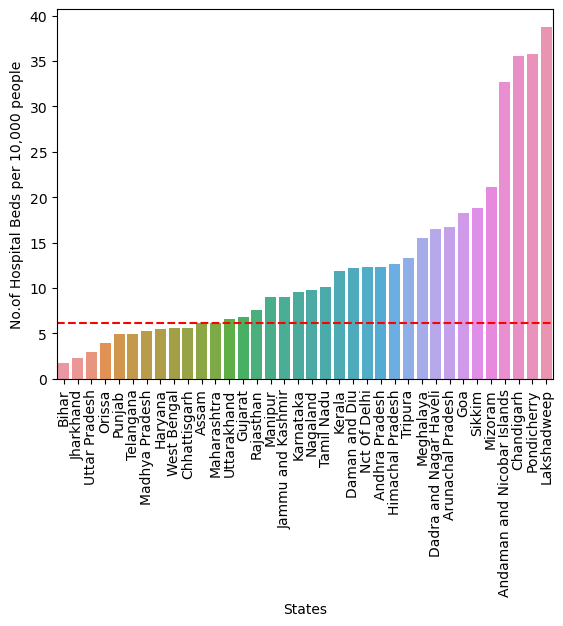

In [133]:
val = merged_df['HospitalBeds'].sum()/merged_df['Population'].sum() *10000
sns.barplot(data = merged_df, x = merged_df['State/UT'], y = merged_df['no_ofbeds_per_10k_people'])
plt.axhline(y=val, color='r', linestyle='--')
plt.xlabel('States')
plt.ylabel('No.of Hospital Beds per 10,000 people')
plt.xticks(rotation = 90)
plt.show()

**Some of the states having no.of hospital beds per 10k people is less than 5 and even less than the country average. So govt need to focus more on those states as per the above analysis.

# Government Hospitals Requirement Analysis

### Problem -13 (Multi-line header)

In [134]:
government_data = pd.read_csv('Data/government_hospitals.csv')

In [135]:
government_data

,States/UTs,Rural hospitals,Unnamed: 2,Urban hospitals,Unnamed: 4,As on
0,NaN,No.,Beds,No.,Beds,NaN
1,Andhra Pradesh,193,6480,65,16658,01.01.2017
2,Arunachal Pradesh*,208,2136,10,268,31.12.2017
3,Assam,1176,10944,50,6198,31.12.2017
4,Bihar,930,6083,103,5936,31.12.2016
5,Chhattisgarh,169,5070,45,4342,01.01.2016
6,Goa*,17,1405,25,1608,31.12.2017
7,Gujarat,364,11715,122,20565,31.12.2016
8,Haryana*,609,6690,59,4550,31.12.2016
9,Himachal Pradesh*,705,5665,96,6734,31.12.2017


In [136]:
government_data.columns = ['State/UT','Rural_Government_Hospitals','Rural_Government_Beds','Urban_Government_Hospitals','Urban_Government_Beds','Last Updated']

In [137]:
government_data = government_data.drop(0)

In [138]:
government_data

,State/UT,Rural_Government_Hospitals,Rural_Government_Beds,Urban_Government_Hospitals,Urban_Government_Beds,Last Updated
1,Andhra Pradesh,193,6480,65,16658,01.01.2017
2,Arunachal Pradesh*,208,2136,10,268,31.12.2017
3,Assam,1176,10944,50,6198,31.12.2017
4,Bihar,930,6083,103,5936,31.12.2016
5,Chhattisgarh,169,5070,45,4342,01.01.2016
6,Goa*,17,1405,25,1608,31.12.2017
7,Gujarat,364,11715,122,20565,31.12.2016
8,Haryana*,609,6690,59,4550,31.12.2016
9,Himachal Pradesh*,705,5665,96,6734,31.12.2017
10,Jammu & Kashmir,56,7234,76,4417,30.12.2016


### Problem - 14 (Data update and code reuse)

In [139]:
government_data['Last Updated'] = pd.to_datetime(government_data['Last Updated'], format='%d.%m.%Y').dt.strftime('%Y-%m-%d')


In [140]:
government_data['Last Updated']

1     2017-01-01
2     2017-12-31
3     2017-12-31
4     2016-12-31
5     2016-01-01
6     2017-12-31
7     2016-12-31
8     2016-12-31
9     2017-12-31
10    2016-12-30
11    2015-12-31
12    2017-12-31
13    2017-01-01
14    2016-01-01
15    2015-12-31
16    2014-01-01
17    2017-12-31
18    2017-12-31
19    2015-12-31
20    2017-12-31
21    2017-12-31
22    2016-12-31
23    2017-12-31
24    2017-12-31
25    2017-12-31
26    2017-12-31
27    2017-12-31
28    2015-12-31
29    2015-01-01
30    2016-12-31
31    2016-12-31
32    2017-12-31
33    2015-12-31
34    2015-01-01
35    2016-01-01
36    2016-01-01
37           NaN
Name: Last Updated, dtype: object

In [141]:
def fix_function(name):
    name = name.replace('*','')
    name = name.replace('&','and')
    if (name == 'Delhi'):
        name = 'Nct Of Delhi'
    if (name == 'Odisha'):
        name = 'Orissa'
    if (name == 'Puducherry'):
        name = 'Pondicherry'
    if (name == 'INDIA'):
        name = 'All India'
    return name

In [142]:
government_data['State/UT'] = government_data['State/UT'].apply(lambda x: fix_function(x))

In [143]:
government_data['State/UT']

1                  Andhra Pradesh
2               Arunachal Pradesh
3                           Assam
4                           Bihar
5                    Chhattisgarh
6                             Goa
7                         Gujarat
8                         Haryana
9                Himachal Pradesh
10              Jammu and Kashmir
11                      Jharkhand
12                      Karnataka
13                         Kerala
14                 Madhya Pradesh
15                    Maharashtra
16                        Manipur
17                      Meghalaya
18                        Mizoram
19                       Nagaland
20                         Orissa
21                         Punjab
22                      Rajasthan
23                         Sikkim
24                     Tamil Nadu
25                      Telangana
26                        Tripura
27                  Uttar Pradesh
28                    Uttarakhand
29                    West Bengal
30    Andaman 

In [144]:
set(government_data['State/UT']) ^ set(census_data['State/UT'])

{'All India'}

In [145]:
government_data.to_csv('Clean_Data/government_hospitals.csv')

### Problem -15 (Government healthcare facility disparity)

In [191]:
df = pd.merge(government_data,merged_df,on = 'State/UT',how = 'inner')
df['Rural_Government_Beds'] = df['Rural_Government_Beds'].astype(int)
df['Urban_Government_Beds'] = df['Urban_Government_Beds'].astype(int)
df['HospitalBeds'] = df['HospitalBeds'].astype(int)
df['Total Beds'] = df['Rural_Government_Beds'] + df['Urban_Government_Beds'] + df['HospitalBeds']

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


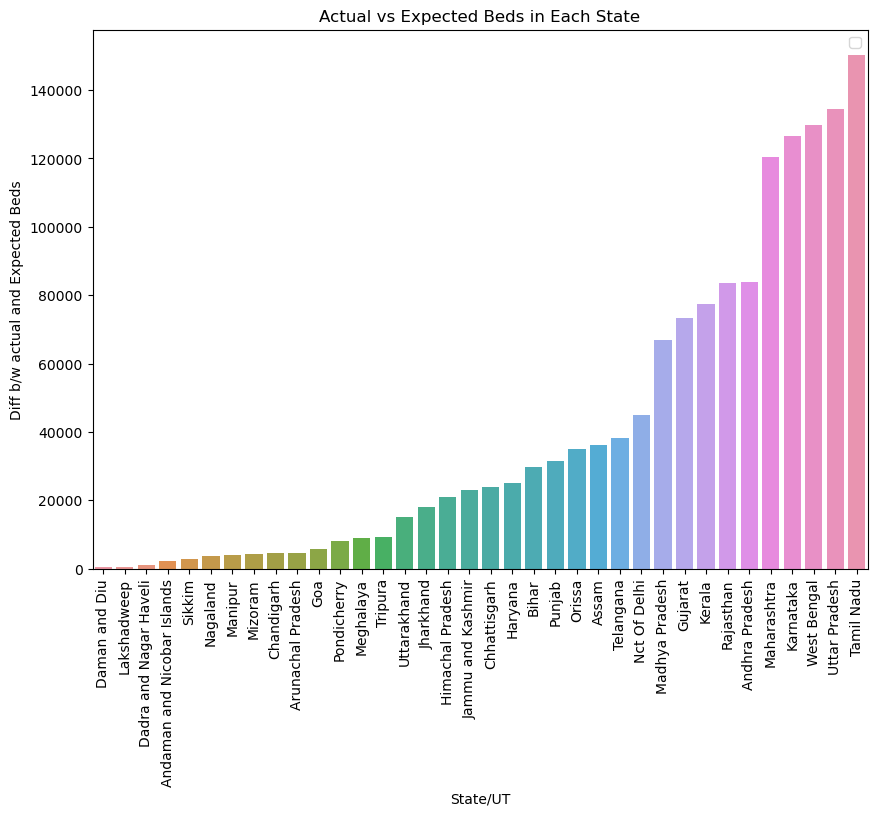

In [192]:
bar_colors = ['#1f77b4', '#ff7f0e']
fig = plt.figure(figsize = (10,7))
sns.barplot(data = df.sort_values('Total Beds'), x = 'State/UT', y = 'Total Beds')
plt.xticks(rotation=90)
plt.xlabel('State/UT')
plt.ylabel('Diff b/w actual and Expected Beds')
plt.title('Actual vs Expected Beds in Each State')
plt.legend()
plt.show()

In [193]:
states = ['Dadra and Nagar Haveli','Daman and Diu','Lakshadweep']
filtered_data = government_data[government_data['State/UT'].isin(states)]

In [194]:
filtered_data

,State/UT,Rural_Government_Hospitals,Rural_Government_Beds,Urban_Government_Hospitals,Urban_Government_Beds,Last Updated
32,Dadra and Nagar Haveli,10,273,1,316,2017-12-31
33,Daman and Diu,5,240,0,0,2015-12-31
35,Lakshadweep,9,300,0,0,2016-01-01


In [195]:
filtered_data['Total Hospitals'] = filtered_data['Rural_Government_Hospitals'].astype(int)  + filtered_data['Urban_Government_Hospitals'].astype(int)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_24544\2506726756.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Total Hospitals'] = filtered_data['Rural_Government_Hospitals'].astype(int)  + filtered_data['Urban_Government_Hospitals'].astype(int)


In [196]:
filtered_data = filtered_data.sort_values('Total Hospitals')

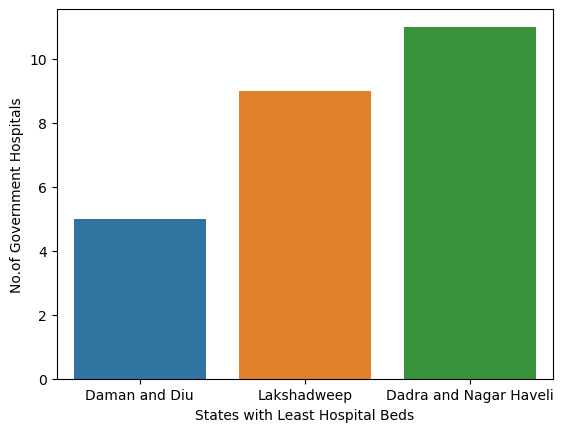

In [197]:
sns.barplot(data = filtered_data, x = filtered_data['State/UT'], y = filtered_data['Total Hospitals'])
plt.xlabel('States with Least Hospital Beds')
plt.ylabel('No.of Government Hospitals')
plt.show()

# World Health Organization Standards

**According to WHO standards, a minimum of 3 beds per 1000 people is required. we have to analyse whether different regions in India as well as the nation as a whole are up to that standard. If not, how many facilities are required to fill the gap?

### Problem -16 (Gap in number of beds)

In [198]:
df['Expected_Beds'] = (df['Population'] / 1000 ) * 3
df['Rural_Government_Hospitals'] = df['Rural_Government_Hospitals'].astype(int)
df['Urban_Government_Hospitals'] = df['Urban_Government_Hospitals'].astype(int)
#print(df[['State/UT','Expected_Beds','Total Beds']])
total_expected_beds = df['Expected_Beds'].sum()
total_available_beds = df['Total Beds'].sum()
total_rural_govt_hospitals = df['Rural_Government_Hospitals'].sum()
total_rural_govt_beds = df['Rural_Government_Beds'].sum()
total_urban_govt_hospitals = df['Urban_Government_Hospitals'].sum()
total_urban_govt_beds = df['Urban_Government_Beds'].sum()
val = ['All India', total_expected_beds,total_available_beds]
allIndiaResult = pd.DataFrame({'State/UT':['All India'],'Expected_Beds':[total_expected_beds],'Total Beds':[total_available_beds],'Rural_Government_Hospitals':[total_rural_govt_hospitals],'Rural_Government_Beds':[total_rural_govt_beds],'Urban_Government_Hospitals':[total_urban_govt_hospitals],'Urban_Government_Beds':[total_urban_govt_beds]})
df = pd.concat([df,allIndiaResult])


In [199]:
df[df['State/UT'] == 'All India']

,State/UT,Rural_Government_Hospitals,Rural_Government_Beds,Urban_Government_Hospitals,Urban_Government_Beds,Last Updated,"Number of Primary Health Centers(PHCs),","Community Health Centers(CHCs),",Sub-District/Divisional Hospitals(SDHs),District Hospitals(DHs),Hospitals,HospitalBeds,Population,no_ofbeds_per_10k_people,Total Beds,Expected_Beds
0,All India,19810,279588,3772,431173,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1449785,3627023.862


In [180]:
print(df.columns)

Index(['State/UT', 'Rural_Government_Hospitals', 'Rural_Government_Beds',
       'Urban_Government_Hospitals', 'Urban_Government_Beds', 'Last Updated',
       'Number of Primary Health Centers(PHCs), ',
       'Community Health Centers(CHCs), ',
       'Sub-District/Divisional Hospitals(SDHs)', 'District Hospitals(DHs) ',
       'Hospitals', 'HospitalBeds', 'Population', 'no_ofbeds_per_10k_people',
       'Total Beds', 'Expected_Beds', 'Urban_Governmment_Hospitals'],
      dtype='object')


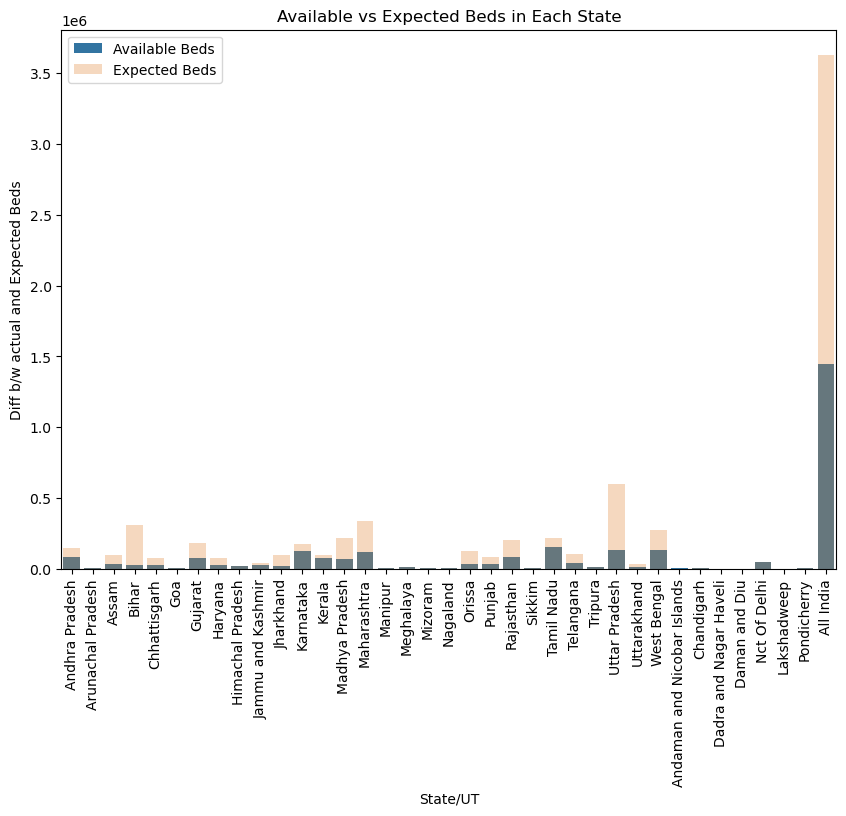

In [181]:
bar_colors = ['#1f77b4', '#ff7f0e']
fig = plt.figure(figsize = (10,7))
sns.barplot(data = df, x = 'State/UT', y = 'Total Beds', color = bar_colors[0],label = 'Available Beds')
sns.barplot(data = df, x = 'State/UT', y = 'Expected_Beds', color = bar_colors[1],label = 'Expected Beds',alpha = 0.3)
plt.xticks(rotation=90)
plt.xlabel('State/UT')
plt.ylabel('Diff b/w actual and Expected Beds')
plt.title('Available vs Expected Beds in Each State')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


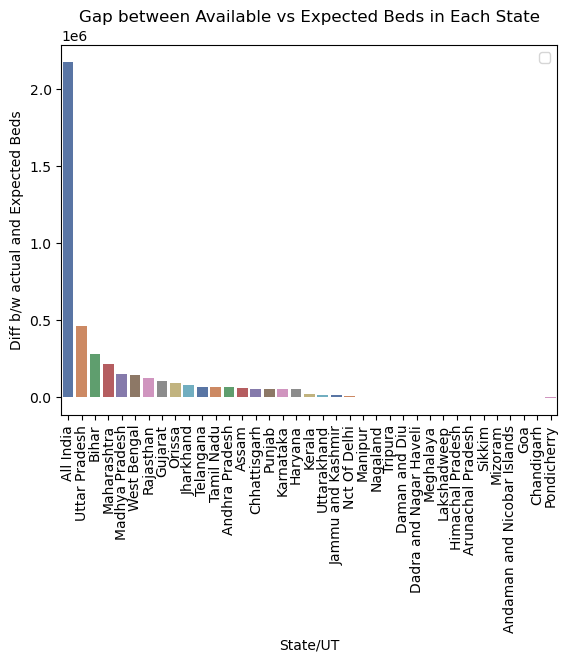

In [201]:
df['Gap_in_beds'] = df['Expected_Beds'] - df['Total Beds']
sns.barplot(data = df.sort_values('Gap_in_beds',ascending = False), x = 'State/UT', y = 'Gap_in_beds',palette='deep')
plt.xticks(rotation=90)
plt.xlabel('State/UT')
plt.ylabel('Diff b/w actual and Expected Beds')
plt.title('Gap between Available vs Expected Beds in Each State')
plt.legend()
plt.show()

### Problem -17 (Hospitals required to meet the standards)

In [202]:
from math import ceil
df['Avg_beds_in_Govt_Hospital'] = (df['Rural_Government_Beds'] + df['Urban_Government_Beds']) / (df['Rural_Government_Hospitals'].astype(int) + df['Urban_Government_Hospitals'].astype(int))
df['Government_Hospitals_Required'] = df['Gap_in_beds'] / df['Avg_beds_in_Govt_Hospital']
df.loc[df['Government_Hospitals_Required'] < 0,'Government_Hospitals_Required'] = 0
df['Government_Hospitals_Required'] = df['Government_Hospitals_Required'].apply(lambda x: ceil(x))
df['Government_Hospitals_Required']

0       717
1         0
2      4103
3     24279
4      1203
5         0
6      1625
7      3030
8         0
9       166
10     4158
11     2078
12      765
13     2360
14     2995
15       97
16        0
17        0
18       41
19     8856
20     1969
21     2880
22        0
23     1041
24     2766
25       60
26    28255
27      816
28     2873
29        0
30        0
31        0
32        4
33       25
34        0
35        0
0     72238
Name: Government_Hospitals_Required, dtype: int64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


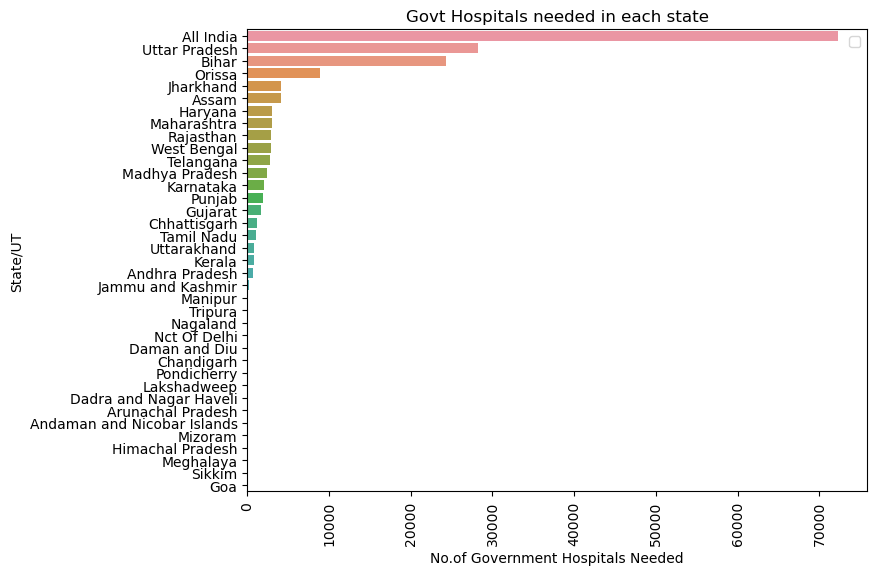

In [203]:
fig = plt.figure(figsize = (8,6))
sns.barplot(data = df.sort_values('Government_Hospitals_Required',ascending = False), y = 'State/UT', x = 'Government_Hospitals_Required',orient = 'horizontal')
plt.xticks(rotation=90)
plt.ylabel('State/UT')
plt.xlabel('No.of Government Hospitals Needed')
plt.title('Govt Hospitals needed in each state')
plt.legend()
plt.show()

**We need to construct more number of govt hospitals in the states such as Uttar Pradesh,Bihar and Orissa as they require more no.of government hospitals

In [263]:
df[['State/UT','Population','Total']].sort_values('Population',ascending = False)

,State/UT,Population
26,Uttar Pradesh,199812341.0
14,Maharashtra,112374333.0
3,Bihar,104099452.0
28,West Bengal,91276115.0
13,Madhya Pradesh,72626809.0
23,Tamil Nadu,72147030.0
21,Rajasthan,68548437.0
6,Gujarat,60439692.0
11,Karnataka,59248274.0
0,Andhra Pradesh,49386799.0


In [264]:
df.columns

Index(['State/UT', 'Rural_Government_Hospitals', 'Rural_Government_Beds',
       'Urban_Government_Hospitals', 'Urban_Government_Beds', 'Last Updated',
       'Number of Primary Health Centers(PHCs), ',
       'Community Health Centers(CHCs), ',
       'Sub-District/Divisional Hospitals(SDHs)', 'District Hospitals(DHs) ',
       'Hospitals', 'HospitalBeds', 'Population', 'no_ofbeds_per_10k_people',
       'Total Beds', 'Expected_Beds', 'Avg_beds_in_Govt_Hospital',
       'Gap_in_beds', 'Government_Hospitals_Required'],
      dtype='object')